# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [6]:
credito = pd.read_csv('credito.csv')
credito

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,1,1,1,0,58.832877,3.106849,1,0,0,0,...,1,1,0,0,0,1,0,0,0,0
1,0,0,1,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
2,0,0,1,0,52.356164,8.358904,1,0,1,1,...,1,0,0,1,0,1,0,0,0,0
3,1,1,1,0,46.224658,2.106849,1,1,1,1,...,0,1,0,0,0,1,0,0,0,0
4,0,1,0,0,29.230137,3.021918,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,0,0,1,0,54.109589,9.884932,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
16646,0,0,1,0,43.389041,7.380822,1,1,1,0,...,1,1,0,0,0,1,0,0,0,0
16647,1,1,1,0,30.005479,9.800000,1,1,0,0,...,1,1,0,0,0,1,0,0,0,0
16648,1,1,1,0,30.005479,9.800000,1,1,0,0,...,1,1,0,0,0,1,0,0,0,0


In [10]:
y = credito.mau
X = credito.drop('mau', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [11]:
# 1.
clf = DecisionTreeClassifier(random_state=100)

In [12]:
# 2.
clf = clf.fit(X_train,y_train)

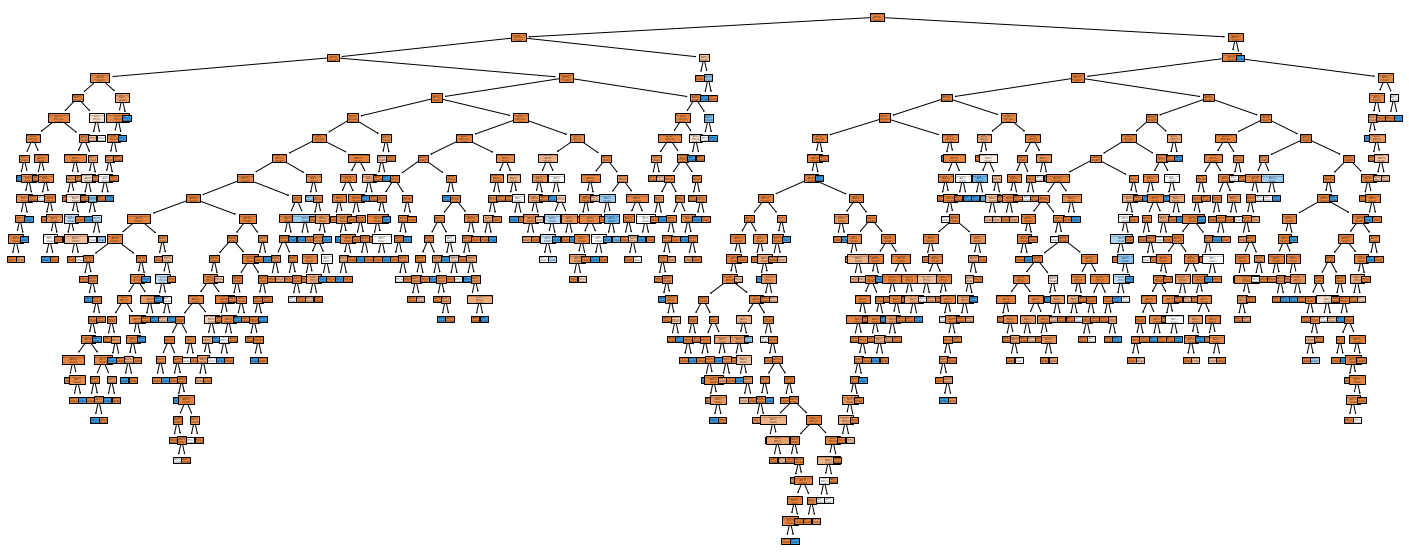

In [13]:
# 3.
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Reprovados', 'Aprovados'],
          feature_names=X.columns);

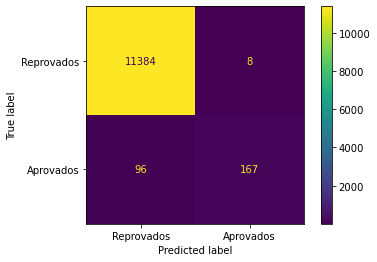

In [14]:
# 4.
plot_confusion_matrix(clf, X_train, y_train, display_labels=['Reprovados', 'Aprovados']);

In [15]:
# 5.
predict_train = clf.predict(X_train)
accuracy_score(y_train, predict_train)

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [16]:
# 1
clf = clf.fit(X_test,y_test)

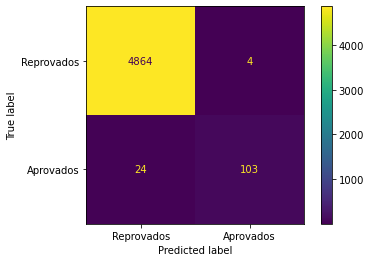

In [17]:
# 2.
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Reprovados', 'Aprovados']);

In [18]:
# 3.
predict_test = clf.predict(X_test)
accuracy_score(y_test, predict_test)

0.9943943943943944

A acurácia de treinamento deu 0.991 e a de teste foi 0.994, mostra que ambos foram bem similares, sendo ótimos os resultados.

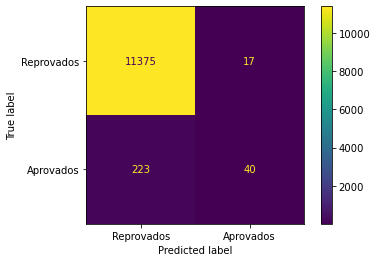

In [19]:
# 4.
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf.fit(X_train,y_train)
plot_confusion_matrix(clf, X_train, y_train, display_labels=['Reprovados', 'Aprovados']);

Baseando na matriz de confusão do treino, temos uma diminuição em Reprovados X Reprovados (Mau X Mau) e aumento em Reprovados X Aprovados (Mau X Bom). A comparação feita com o Treino antes da modificação na profundidade e na observação por folhas.

0.004890604890604891

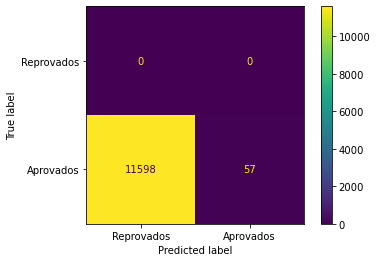

In [31]:
# 5.

y_train_bons = y_train.copy()
y_train_bons.iloc[:] = 1

clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf.fit(X_train,y_train)

plot_confusion_matrix(clf, X_train, y_train_bons, display_labels=['Reprovados', 'Aprovados']);

predict_train = clf.predict(X_train)
accuracy_score(y_train_bons, predict_train)

0.015015015015015015

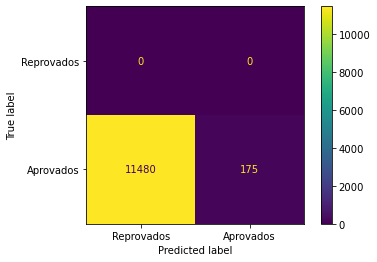

In [32]:
y_train_bons = y_train.copy()
y_train_bons.iloc[:] = 1

clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)

plot_confusion_matrix(clf, X_train, y_train_bons, display_labels=['Reprovados', 'Aprovados']);

predict_train = clf.predict(X_train)
accuracy_score(y_train_bons, predict_train)

Para verificar como ficaria a acurácia, foi feito novos treinos. Primeiro: com a modificação na profundidade e na observação por folha; Segundo: Sem as modificações solicitadas.

Temos que:
    No primeiro a acurácia fica: 0.004890604890604891.
    No segundo a acurácia fica: 0.015015015015015015.
    No segundo caso a acurácia fica melhor, apenas em comparação uma com a outra. Os números não são bons comparados ao uso dos modelos originais.